# Disciplina de Aprendizado de Máquina não supervisionado

## Aula 07

### Técnicas Não Supervisionadas de Redução de Dimensionalidade

#### Parte I: Visão Geral

O aprendizado não-supervisionado envolve outras questões além de *clusterização*. Uma delas, bastante importante, consiste em analisar as relações entre diferentes variáveis (dimensões) com o intuito de agrupá-las ou reduzi-las a um subconjunto menor. Isso é chamado de **redução de dimensionalidade** (*dimensionality reduction*). 

Esse tipo de processo é relevante porque os *data sets* reais normalmente possuem muitas variáveis (e, portanto, muitas dimensões). Nesses casos, a alta quantidade de variáveis (alta dimensionalidade) pode ocasionar o problema chamado de `maldição da dimensionalidade` ([*Curse of dimensionality*](https://en.wikipedia.org/wiki/Curse_of_dimensionality)).

Diantes disso, pode ser interessante aplicarmos alguma técnica para reduzir a quantidade de dimensões. Elas são normalmente aplicadas por dois motivos: (1) facilitar a visualização (visto que não temos como mostrar nem reconhecer relações com mais do que 3 dimensões); (2) permitir com que conjuntos de dados complexos sejam processados por algoritmos de mineração de dados, aprendizado de máquina e outros.

Vamos hoje usar algumas técnicas de redução de dimensionalidade, entre elas: PCA, Análise fatorial e UMAP. Essas não são as únicas, mas são as mais relevantes dentro do contexto de nossa disciplina (lembre-se que, em uma aula anterior, vimos a [MDS]( https://scikit-learn.org/stable/modules/manifold.html#multidimensional-scaling)).

Cabe destacar que PCA e análise fatorial são técnicas lineares, enquanto que  UMAP (e seu predecessor, t-SNE) não são lineares (também chamadas de aprendizado múltiplo ou *manifold learning*). 

#### Parte II: *Principal Component Analysis* (PCA)

A **Análise de Componentes Principais** ou PCA (do inglês, *Principal Component Analysis*) é uma técnica linear de redução de dimensionalidade que é utilizada para extrair informação de um espaço de alta-dimensionalidade, projetando-o para um subespaço de baixa-dimensionalidade. Tenta preservar as partes essenciais, que possuem mais variação de dados, removendo as partes com pouca variação (não essenciais). PCA é um processo não supervisionado e estatístico. 

Para tanto, PCA realiza uma transformação ortogonal, convertendo um conjunto de observações de variáveis possivelmente correlacionadas em um conjunto de variáveis linearmente não correlacionadas, as quais são denominadas de componentes principais. 

Um `componente principal` representa *o que está "sob o capô" dos dados*. Os componentes (ou dimensões do subespaço) nada mais são do que elementos que capturam (ou mantém, seguram) a maior parte da variância (i.e., informação) dos dados. 

Os componentes principais possuem uma direção e uma magnitude. A direção representa em quais eixos principais os dados estão mais espalhados ou têm mais variância. A magnitude significa a quantidade de variância que o componente principal captura dos dados quando projetados nesse eixo. 

Os componentes principais são uma linha reta e o primeiro componente principal contém a maior variância nos dados. Cada componente principal subsequente é ortogonal ao último e têm variâncias menores. 

Dessa forma, dado um conjunto de $x$ variáveis correlacionadas em $y$ amostras, você obtém um conjunto de $u$ componentes principais não correlacionados nas mesmas $y$ amostras.

A razão pela qual você obtém componentes principais não correlacionados dos recursos originais é que os recursos correlacionados contribuem para o mesmo componente principal, reduzindo assim os recursos de dados originais em componentes principais não correlacionados, cada um representando um conjunto diferente de características correlacionadas com diferentes quantidades de variância. Cada componente principal representa uma porcentagem da variância total capturada dos dados.

Você pode usar PCA para facilitar a visualização de dados multidimensionais ou pode usar PCA para acelerar um algoritmo de aprendizado de máquina.

Vamos exemplificar a aplicação de PCA utilizando o conjunto de dados `Iris`, que já trabalhamos. Repare que vamos usar o `StandardScaler` para reescalonar os dados antes do PCA, padronizando-os em escala de unidade (média = 0 e variância = 1), visto que O PCA é afetado pela escala. 

In [153]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values

x = StandardScaler().fit_transform(x)

Para esse conjunto de dados, vamos tentar condensá-los em 3 componentes principais (para podermos visualizar os elementos em uma figura 3D).

O trecho seguinte usa a biblioteca `PCA` para identificar 3 componentes principais no *dataset*:

In [154]:
pca3 = PCA(n_components=3)
principalComponents = pca3.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

pca3 = PCA(n_components=3)
principalComponents = pca3.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf


,PC1,PC2,PC3,target
0,-2.264542,0.505704,-0.121943,Iris-setosa
1,-2.086426,-0.655405,-0.227251,Iris-setosa
2,-2.367950,-0.318477,0.051480,Iris-setosa
3,-2.304197,-0.575368,0.098860,Iris-setosa
4,-2.388777,0.674767,0.021428,Iris-setosa
...,...,...,...,...
145,1.870522,0.382822,0.254532,Iris-virginica
146,1.558492,-0.905314,-0.025382,Iris-virginica
147,1.520845,0.266795,0.179277,Iris-virginica
148,1.376391,1.016362,0.931405,Iris-virginica


Vamos verificar como ficam esses 3 componentes no espaço de 3 dimensões:

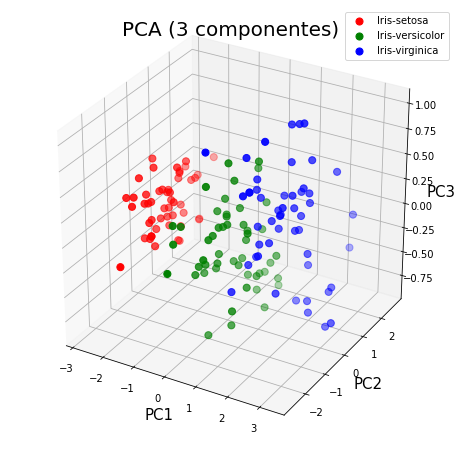

In [155]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_zlabel('PC3', fontsize = 15)
ax.set_title('PCA (3 componentes)', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], 
               finalDf.loc[indicesToKeep, 'PC2'],
               finalDf.loc[indicesToKeep, 'PC3'],
               c = color, s = 50)
ax.legend(targets)
ax.grid()

Também podemos reduzir para 2 componentes principais, se for mais conveniente para nós:

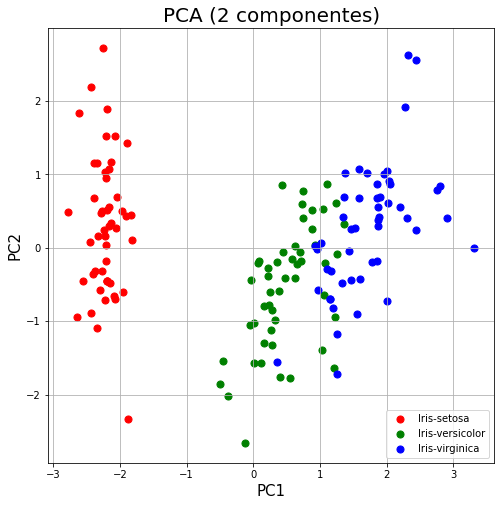

In [156]:
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA (2 componentes)', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], 
               finalDf.loc[indicesToKeep, 'PC2'],               
               c = color, s = 50)
ax.legend(targets)
ax.grid()

Quanto menos componentes utilizarmos, menos variância teremos (e provavelmente pior será a qualidade da representação, visto que há perdas em relação aos dados originais).

Para termos uma noção da qualidade da representação de cada componente principal, podemos calcular a `taxa de variância explicada`, que informa quanta informação pode ser atribuída a cada um dos componentes principais. 

Portanto, embora possamos converter o espaço de 4 dimensões em espaço de 2 ou 3 dimensões, haverá alguma perda ao fazer a redução (já que parte da informação ou variância é perdida). 

O atributo seguinte mostra essa métrica para cada componente principal do modelo com 2 componentes:

In [157]:
pca2.explained_variance_ratio_

array([0.72770452, 0.23030523])

Podemos verificar que o primeiro componente principal contém 72% da variância e o segundo somente 23%. Somados, ambos contêm 95,8% da informação. 

Com 3 componentes, ampliamos a quantidade de informação para 99,4%, veja:

In [158]:
pca3.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832])

Maiores detalhes sobre a biblioteca Python para aplicar PCA podem ser obtidos [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

---
**Exercício 1**: O código seguinte carrega um *dataset* que contém informações sobre câncer de mama.

Usando PCA, avalie quantos componentes principais seriam necessários para representar pelo menos 80% da variância dos dados (`explained_variance_ratio_`). 

Após, selecione os 3 primeiros componentes principais e gere uma visualização em 3D dos dados. Informe quanto do total de variância é explicado ou representado por esses 3 componentes (objetivo de visualização de dados). 

Após, clusterize com `k-means` (considerando `k`=2) e com o `espectral` e contraste com os labels originais (objetivo de pré-processamento). 

In [159]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

dataset = load_breast_cancer()

dados = dataset.data
labels = dataset.target

labels = np.reshape(labels,(569,1))

df_dados = pd.DataFrame(np.concatenate([dados,labels],axis=1))
features = dataset.feature_names
features_labels = np.append(features,'Rotulo')

df_dados.columns = features_labels
df_dados['Rotulo'].replace(0, 'Benigno',inplace=True)
df_dados['Rotulo'].replace(1, 'Maligno',inplace=True)
df_dados.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Rotulo
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benigno
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benigno
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benigno
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benigno
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benigno


**Parte 1:**Usando PCA, avalie quantos componentes principais seriam necessários para representar pelo menos 80% da variância dos dados

In [160]:
x = df_dados.drop(columns=['Rotulo'])
y = df_dados.loc[:,['Rotulo']].values

x = StandardScaler().fit_transform(x)

# for num in range(2, 30):
for num in range(2, 10):
    print("Número de componentes: ", num)
    pca = PCA(n_components=num)
    principalComponents = pca.fit_transform(x)
    print("Variância de dados por componente: ", pca.explained_variance_ratio_, ", Total:", sum(pca.explained_variance_ratio_))

Número de componentes:  2
Variância de dados por componente:  [0.44272026 0.18971182] , Total: 0.6324320765155954
Número de componentes:  3
Variância de dados por componente:  [0.44272026 0.18971182 0.09393163] , Total: 0.7263637090868724
Número de componentes:  4
Variância de dados por componente:  [0.44272026 0.18971182 0.09393163 0.06602135] , Total: 0.7923850582445804
Número de componentes:  5
Variância de dados por componente:  [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768] , Total: 0.8473427431679569
Número de componentes:  6
Variância de dados por componente:  [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522] , Total: 0.887587963566635
Número de componentes:  7
Variância de dados por componente:  [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734] , Total: 0.9100953006900744
Número de componentes:  8
Variância de dados por componente:  [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724

Número de componentes:  5

Variância de dados por componente:  [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768]

Total:  0.8473427431680622

Com 5 componentes atingimos 84% da quantidade de informação

**Parte 2:** Selecione os 3 primeiros componentes principais e gere uma visualização em 3D dos dados. 

Informe quanto do total de variância é explicado ou representado por esses 3 componentes (objetivo de visualização de dados).

In [161]:
# funcao util para plotar grafico 3d
def plot_3d(title, coluna_alvo, targets):
  fig = plt.figure(figsize = (6,6))
  ax = fig.add_subplot(111, projection='3d')
  ax.set_xlabel('PC1', fontsize = 15)
  ax.set_ylabel('PC2', fontsize = 15)
  ax.set_zlabel('PC3', fontsize = 15)
  ax.set_title(title, fontsize = 20)
  # targets = ['Maligno', 'Benigno']
  colors = ['r', 'b']
  for target, color in zip(targets,colors):
      indicesToKeep = finalDf[coluna_alvo] == target
      ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], 
                finalDf.loc[indicesToKeep, 'PC2'],
                finalDf.loc[indicesToKeep, 'PC3'],
                c = color, s = 50)
  ax.legend(targets)
  ax.grid()

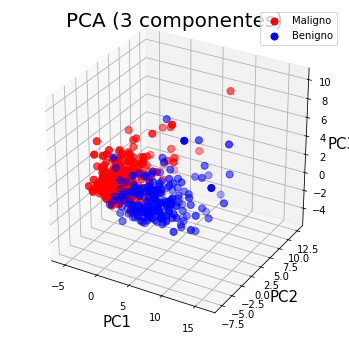

In [162]:
pca3 = PCA(n_components=3)
principalComponents = pca3.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])
finalDf = pd.concat([principalDf, df_dados[['Rotulo']]], axis = 1)
finalDf

plot_3d('PCA (3 componentes)', "Rotulo", ['Maligno', 'Benigno'])

**Parte 3:** Clusterize com k-means (considerando k=2) e com o espectral e contraste com os labels originais (objetivo de pré-processamento).

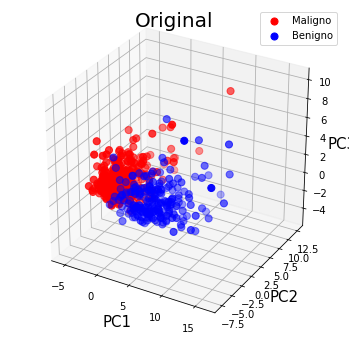

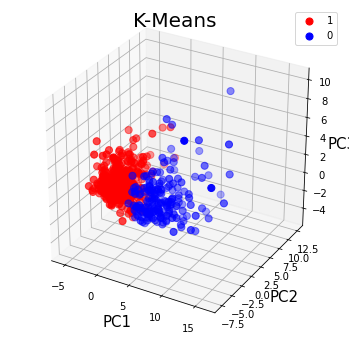

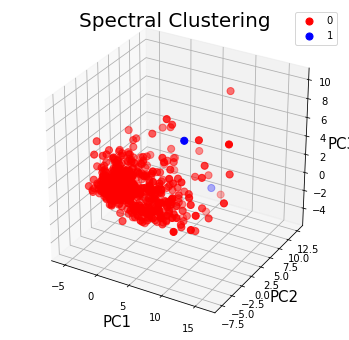

In [163]:
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
# original
plot_3d('Original', "Rotulo", ['Maligno', 'Benigno'])

#  kmeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(x)

finalDf['kmeans'] = kmeans.labels_
plot_3d("K-Means", "kmeans", [1, 0])

# spectral
espectral = SpectralClustering(n_clusters=2, random_state=42)
espectral.fit(x)

finalDf['espectral'] = espectral.labels_
plot_3d("Spectral Clustering", "espectral", [0, 1])



---
#### Parte II: Análise Fatorial (*factorial Analysis*)

A **Análise Fatorial** é um tipo de análise exploratória que tem o objetivo de identificar fatores subjacentes influentes (i.e., as variáveis latentes), de um conjunto de variáveis. Ela auxilia na interpretação de dados, reduzindo o número de variáveis a serem analisadas. Seu princípio está relacionado com a extração da máxima variância comum de todas as variáveis, colocando-as em um escore comum.

É um modelo estatístico linear, usado para explicar a variância entre as variáveis observadas e condensar um conjunto de variáveis observadas em variáveis não observadas, chamadas de fatores. As variáveis observadas são modeladas como uma combinação linear de `fatores` e `termos de erro`. 

Um fator ou variável latente é associado a múltiplas variáveis observadas, que possuem padrões comuns de resposta. Cada fator explica quantidades específicas de variância nas variáveis observadas, auxiliando com a interpretação de dados e reduzindo o número de variáveis.

A Análise Fatorial tem uma questão relevante, que envolve **decidir quantos fatores utilizar**. Para tanto, existe uma abordagem analítica, baseada no chamado `critério de Kaiser`, que baseia-se na proporção mais significante de variância explicada por fatores. Para tanto, podemos usar os autovalores (*eigenvalues*), selecionando todos aqueles cujo escore seja maior do que `1`. Também podemos utilizar uma abordagem gráfica baseada na representação visual dos autovalores dos fatores (chamada de [*Scree Plot*](https://en.wikipedia.org/wiki/Scree_plot)), a qual nos ajuda a determinar o número de fatores analisando os `cotovelos` existentes, mas esses gráficos eventualmente possuem vários cotovelos, dificultando uma abordagem algorítmica.

Em contraste com PCA, a análise fatorial explica a covariância dos dados, enquanto que PCA explica a quantidade máxima de variância. Além disso, na PCA os componentes principais são totalmente ortogonais uns aos outros, mas isso não é necessário na análise fatorial. Na análise fatorial, as variáveis observadas são compreendidas como combinações lineares da variável não observada (o fator), enquanto que um componente principal é uma combinação linear das variáveis observadas. Ainda, os componentes principais obtidos com a PCA não são interpretáveis, já os fatores subjacentes são interpretáveis e etiquetáveis. Com isso, PCA acaba sendo um tipo de análise mais observacional, enquanto que análise fatorial é uma técnica de modelagem. 

**Para usarmos a Análise Fatorial, primeiro temos que avaliar a capacidade de fatorialização do *dataset*.** 

Existem duas maneiras de fazer isso:
- `Teste (de esfericidade) de Bartlet`: verifica se as variáveis observadas se correlacionam ou não verificando a matriz de correlação observada contra a matriz de identidade. Se o teste for estatisticamente insignificante, você não deve empregar uma análise fatorial.

- `Teste de Kaiser-Meyer-Olkin (KMO)`: determina a adequação para cada variável observada e para o modelo completo, estimando a proporção de variância entre todas as variáveis observadas. Os valores variam entre 0 e 1, sendo que um KMO inferior a $0,6$ é considerado inadequado.

Maiores detalhes sobre análise fatorial podem ser obtidas no livro [Análise Fatorial, de Matos e Rodrigues (2019)](https://repositorio.enap.gov.br/bitstream/1/4790/1/Livro%20An%C3%A1lise%20Fatorial.pdf), disponível gratuitamente online. Para uma visão geral rápida dos tipos de análise fatorial (exploratória vs confirmatória) e sua utilidade, [clique aqui](https://statplace.com.br/blog/analise-fatorial/).

Para iniciarmos, vamos instalar a biblioteca [`factor analyzer`](https://factor-analyzer.readthedocs.io/en/latest/introduction.html):

In [164]:
!pip install factor-analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Usaremos as bibliotecas seguintes:

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

Agora vamos carregar um *dataset* para explorarmos.

Vamos usar um *dataset* disponível em um [repositório](https://vincentarelbundock.github.io/Rdatasets/) que contém uma coleção de 1.892 datasets criados para o ambiente `R`.

Esse **dataset** contém 2.800 observações envolvendo 25 itens de personalidade (autoavaliados). Detalhes podem ser obtidos [clicando-se aqui](https://vincentarelbundock.github.io/Rdatasets/doc/psych/bfi.html). Análises prévias indicam que o *dataset* tem 5 fatores!

O código seguinte carrega o dataset em memória e faz um pré-processamento que remove algumas variáveis irrelevantes para esse tipo de análise:

In [166]:
df= pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/psych/bfi.csv")
df.drop(['gender', 'education', 'age'],axis=1,inplace=True) # remove variáveis demográficas para não atrapalhar a análise
df.dropna(inplace=True) # remove atributos sem dados (NA)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2436 non-null   int64  
 1   A1          2436 non-null   float64
 2   A2          2436 non-null   float64
 3   A3          2436 non-null   float64
 4   A4          2436 non-null   float64
 5   A5          2436 non-null   float64
 6   C1          2436 non-null   float64
 7   C2          2436 non-null   float64
 8   C3          2436 non-null   float64
 9   C4          2436 non-null   float64
 10  C5          2436 non-null   float64
 11  E1          2436 non-null   float64
 12  E2          2436 non-null   float64
 13  E3          2436 non-null   float64
 14  E4          2436 non-null   float64
 15  E5          2436 non-null   float64
 16  N1          2436 non-null   float64
 17  N2          2436 non-null   float64
 18  N3          2436 non-null   float64
 19  N4          2436 non-null  

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


Vamos **avaliar se podemos aplicar análise fatorial** pelo critério de **esfericidade de Bartlett**:


In [167]:
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value 

(18184.30630782077, 0.0)

Como o `p-value` é $0.0$ então o resultado foi estatisticamente significante (i.e., a matriz de correlação não é uma matriz identidade).

Também podemos **aplicar o teste `KMO`**:

In [168]:
kmo_all,kmo_model=calculate_kmo(df)
kmo_model # o valor é alto o suficiente e indica que podemos seguir adiante

0.8483267027192372

O resultado é acima de $0.6$ e, portanto, **o conjunto de dados pode passar por análise fatorial**.

Para tanto, vamos utilizar o módulo `FactorAnalyzer` instalado anteriormente: 

In [169]:
# Aplica análise fatorial
fa = FactorAnalyzer(rotation=None, n_factors=25, is_corr_matrix=False) 
fa.fit(df)

FactorAnalyzer(n_factors=25, rotation=None, rotation_kwargs={})

No caso, como estamos aplicando `análise fatorial exploratória`, não aplicamos nenhuma técnica de `rotação` (técnica utilizada após o modelo ter sido estimado, a fim de produzir uma estrutura mais simples e interpretável, permitindo identificar quais variáveis estão carregadas em cada fator). 

Vamos analisar os autovalores. Eles representam a variância explicada por cada fator a partir da variância total:

In [170]:
# a sugestão é escolher aqueles cujo valor for maior do que 1 
ev, v = fa.get_eigenvalues()
list(ev)                      

[5.13457985023291,
 2.753375273647617,
 2.148142120011061,
 1.852506226342574,
 1.5484625449920804,
 1.110661507792667,
 0.980676951609959,
 0.8243087203784681,
 0.795162173979687,
 0.7182898158267592,
 0.6860256555705427,
 0.676148512867299,
 0.6517756175720953,
 0.6229741642648153,
 0.596230841330262,
 0.5624459895626452,
 0.5432988554701452,
 0.514340307044964,
 0.4943715400265299,
 0.48263948521809963,
 0.44865494564898045,
 0.42280589180828987,
 0.40028480619493967,
 0.3877375710260342,
 0.3818372343146077,
 0.26226339726596476]

Vamos fazer o **plot** dos valores (a linha vermelha indica o limiar $1$ sugerido acima, e foi desenhada manualmente). Podemos usar a técnica do cotovelo, procurando o ponto de inflexão da curva, e usar esse ponto como base para o número de fatores. 



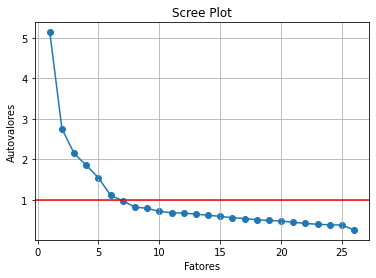

In [171]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.axhline(y = 1, color = 'r', linestyle = '-')
plt.xlabel('Fatores')
plt.ylabel('Autovalores')
plt.grid()
plt.show()

Podemos perceber, pelo gráfico ou pela lista, que há $6$ fatores com valor acima de $1$.

Vamos então utilizar `6` fatores para seguir a análise, com perda mínima de informação.

A seguir, reaplicamos a análise fatorial, indicando $6$ fatores como parâmetro. 

Existem várias técnicas para a extração dos fatores (p.ex., `componentes principais`, `máxima verossimilhança`, `fatores principais`, `mínimos quadrados ordinários` etc). O primeiro é o PCA, que já vimos. 

A biblioteca que estamos utilizando disponibiliza nove opções diferentes de rotação. Algumas são ortogonais outras são obliquas. 

Vamos utilizar a `máxima verossimilhança` (`varimax`) desta vez. Ela encontra as cargas fatoriais que maximizam a probabilidade de a amostra gerar uma matriz de correlações observadas. Ela maximiza a soma da variância das cargas quadradas, preservando a ortogonalidade da matriz de carga (em um caso real, ele só deve ser utilizado se você tiver certeza de que os fatores não estão correlacionados!). Se desejar, troque por `promax`, que realiza rotação obliqua e também permite que os fatores sejam correlacionados. 

In [172]:
fa = FactorAnalyzer(rotation="varimax", n_factors=6)
fa.fit(df)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

Com a rotação, temos como distinguir melhor os fatores. A rotação faz com que os eixos dos fatores sejam adaptados de maneira que as variáveis fiquem carregadas ao máximo somente em um fator, maximizando cargas altas e minimizando as baixas.

Em seguida, solicitamos para verificar a carga de cada fator através de uma matriz que ilustra o relacionamento de cada variável com os respectivos fatores solicitados. A literatura sugere que cargas fatorias boas sejam aquelas acima de $0.4$ para fatores primários, que carreguem abaixo de $0.3$ em fatores secundários e que demonstrem uma diferença de $0.2$ entre suas cargas fatoriais primárias e sedundárias. 

In [173]:
cargas = pd.DataFrame(fa.loadings_, columns=range(1,7)) # range vai até o último fator+1

# mostra as variáveis (linhas) e os 6 fatores 
limiar = 0.5 # define um valor mínimo para destacar as células
cargas.style.applymap((lambda c: "background-color: lightgreen" if c>limiar else ("background-color: lightblue" if c<-limiar else "background-color: white; color: lightgray")))

,1,2,3,4,5,6
0,-0.022903,-0.032472,0.033169,-0.038093,0.003795,0.103748
1,0.099396,0.060474,0.026694,-0.530785,-0.120309,0.163638
2,0.031767,0.259875,0.140226,0.646569,0.055770,-0.097050
3,-0.005256,0.408849,0.109534,0.587004,0.016184,0.039149
4,-0.079266,0.255342,0.229308,0.391760,-0.136293,0.033401
5,-0.143645,0.491049,0.085649,0.451090,0.009111,0.105888
6,0.005623,0.123647,0.540150,0.004221,0.183458,0.138798
7,0.084358,0.106505,0.652496,0.056538,0.079203,0.208580
8,-0.033946,0.049796,0.545877,0.100286,-0.012372,0.054480
9,0.231617,0.008989,-0.672785,-0.089980,-0.153451,0.226977


Esses números de `carga fatorial` indicam a força da relação entre cada variável e os fatores, e podem ser interpretados como a correlação das variáveis com os diferentes fatores. Valores positivos indicam que a variável está positivamente correlacionada com o fator. Valores negativos indicam o contrário. 

Perceba que todas as variáveis estão de alguma forma relacionadas com todos os fatores. Isso é esperado, mas, idealmente, *variáveis deveriam ter carga fatorial alta para um fator (aquele ao qual pertencem) e baixa para todos os outros*. Isso indicaria que a variável se relaciona com um único fator (ou fortemente com ele). Por exemplo, a variável 2 está mais relacionada com o fator 4 do que com os demais.

Mas isso nem sempre ocorre. Então, *variáveis com valores altos no mesmo eixo devem estar medindo aspectos do mesmo fator* (i.e., da mesma dimensão comum subjacente).

No exemplo, o fator 6 não tem nenhuma carga alta para qualquer variável e não é facilmente interpretável (não é possível saber a qual fator pertence). Nesse caso, podemos verificar as comunalidades dos itens.

A *comunalidade* é um conceito que diz respeito à proporção de variância comum presente numa determinada variável, ou, ainda, a quantia total de variância que uma variável original compartilha com todas as outras variáveis incluídas na análise. Quando a comunidade é 1, a variável não tem variância específica ou de erro. Uma variável que não compartilha variância com nenhuma outra teria comunalidade igual a 0. Para ser satisfatória, sugere-se na literatura que o valor mínimo seja 0,5. 

A forma mais comum de medir a comunalidade é a correlação múltipla ao quadrado. Nesse caso, elevamos a correlação ao quadrado (o sinal não importa). Assim teríamos um indicativo da importância de cada variável para os diferentes fatores.  

In [174]:
limiar = 0.5 
df_comunalidades = pd.DataFrame(fa.get_communalities(), columns=["comunalidade"])
df_comunalidades.style.applymap((lambda c: "background-color: lightgreen" if c>limiar else "background-color: white; color: lightgray"))

,comunalidade
0,0.014908
1,0.337234
2,0.518788
3,0.525550
4,0.297232
5,0.483876
6,0.360022
7,0.497186
8,0.314793
9,0.589529


Perceba, que a `Variável 0`, além de apresentar cargas fatoriais baixas, também tem um valor de comunalidade muito baixo. Com base nesses dois critérios, esse item poderia ser removido da análise. As demais, apesar de algumas também não terem valores de comunalidade muito altos, possuem cargas fatoriais mais altas, e não devem ser excluídas. Sempre use mais de um critério!

Para terminar, vamos avaliar o modelo global como um tudo. O código seguinte avalia três métricas relevantes: `SS loadings` (soma das cargas ao quadrado), `Proportion Var` e `Cumulative Var`:

In [175]:
variancia = pd.DataFrame(fa.get_factor_variance(), index=["SS loadings", "Proportion Var", "Cumulative Var"], columns=range(1,7))
variancia

,1,2,3,4,5,6
SS loadings,2.767212,2.728140,2.075546,1.610836,1.463354,0.621559
Proportion Var,0.106431,0.104928,0.079829,0.061955,0.056283,0.023906
Cumulative Var,0.106431,0.211360,0.291188,0.353144,0.409426,0.433333


A linha `SS loadings` é a soma das cargas ao quadrado (*Sun of Square loadings*). Representa a variância geral explicada em todas variáveis, por cada fator. Ela pode ser utilizada para determinar o valor de um fator específico. Dizemos que vale a pena manter um fator se sua carga SS for maior que $1$ (perceba que o fator 6 tem valor abaixo disso...). 

A `Proportion Var` são as proporções de variância nas variáveis observadas explicadas por cada fator. 

Já a `Cumulative Var` é a proporção de variância acumulada explicada por todos os fatores. Quanto mais fatores temos, maior é esse valor. Podemos verificar que a variância acumulada pelos 6 fatores é de 43%. 

---
**Exercício 2**: remova a `Variável 0` e refaça a análise fatorial. Verifique se o novo modelo possui itens que se distribuem bem entre os fatores. Avalie se a variância acumulada aumentou (o que significaria que o poder de explicação do modelo teria aumentado). Usar limiar = `0.5`.

**Desafio**: considerando o limiar de 0.5 na matriz de carga fatorial (inclusive), há outras variáveis que poderiam ser excluídas (em especial contrastando com o grau de comunalidade). Refaça a análise excluíndo essas variáveis também. 

In [176]:
df_novo = df.drop(columns=['Unnamed: 0'])
# df.head()

fa = FactorAnalyzer(rotation="varimax", n_factors=6)
fa.fit(df_novo)

cargas = pd.DataFrame(fa.loadings_, columns=range(1,7)) # range vai até o último fator+1

# mostra as variáveis (linhas) e os 6 fatores 
limiar = 0.5 # define um valor mínimo para destacar as células
cargas.style.applymap((lambda c: "background-color: lightgreen" if c>limiar else ("background-color: lightblue" if c<-limiar else "background-color: white; color: lightgray")))


limiar = 0.5 
df_comunalidades = pd.DataFrame(fa.get_communalities(), columns=["comunalidade"])
df_comunalidades.style.applymap((lambda c: "background-color: lightgreen" if c>limiar else "background-color: white; color: lightgray"))

variancia = pd.DataFrame(fa.get_factor_variance(), index=["SS loadings", "Proportion Var", "Cumulative Var"], columns=range(1,7))
variancia

,1,2,3,4,5,6
SS loadings,2.726989,2.602239,2.073471,1.713499,1.504831,0.630297
Proportion Var,0.109080,0.104090,0.082939,0.068540,0.060193,0.025212
Cumulative Var,0.109080,0.213169,0.296108,0.364648,0.424841,0.450053


A variância acumulada pelos 6 fatores aumentou de 43% para 45%.


---
**Exercício 3**: carregue o *dataset* `Iris` e verifique se ele tem as propriedades para a aplicação da análise fatorial.

Se tiver, aplique-a, usando o método `varimax` e considerando `3` fatores. Além disso, avalie a variância acumulada com `2` e com `3` fatores e verifique se a diferença é pequena ou grande ao usarmos `2` ou `3` fatores para representar os mesmos dados.

Além disso, gere a matriz de carga entre fatores e variáveis (para `3` fatores). 

Finalmente, gere um gráfico 2D correlacionando os pontos no espaço de 2 fatores e um (outro) gráfico 3D, usando os 3 fatores. 

In [177]:
df_iris = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

# remove target
df_iris = df_iris.drop(columns=['target'])

# critério de esfericidade de Bartlett
chi_square_value,p_value=calculate_bartlett_sphericity(df_iris)
print("Bartlett: ", chi_square_value, p_value)
#  muito pequeno, mas não é 0.0

# teste KMO:
kmo_all,kmo_model=calculate_kmo(df_iris)
print("KMO: ", kmo_model)
#  abaixo de 0.6

fa_iris = FactorAnalyzer(rotation="varimax", n_factors=3)
fa_iris.fit(df_iris)

variancia = pd.DataFrame(fa_iris.get_factor_variance(), index=["SS loadings", "Proportion Var", "Cumulative Var"], columns=range(1,4))
print(variancia)

# Variância acumulada varia quase 10% de 2 para 3 fatores.

Bartlett:  706.3613782659315 2.5882058732080797e-149
KMO:  0.5363891915874845
                      1         2         3
SS loadings     2.40028  0.830881  0.332899
Proportion Var  0.60007  0.207720  0.083225
Cumulative Var  0.60007  0.807790  0.891015


In [178]:
fa_iris = FactorAnalyzer(rotation="varimax", n_factors=3)
fa_iris.fit(df_iris)

cargas = pd.DataFrame(fa_iris.loadings_, columns=range(1,4)) # range vai até o último fator+1

# mostra as variáveis (linhas) e os 6 fatores 
limiar = 0.5 # define um valor mínimo para destacar as células
cargas.style.applymap((lambda c: "background-color: lightgreen" if c>limiar else ("background-color: lightblue" if c<-limiar else "background-color: white; color: lightgray")))

,1,2,3
0,0.996155,-0.002192,0.031109
1,-0.105693,0.755699,-0.078013
2,0.865314,-0.405980,0.285330
3,0.804994,-0.308182,0.494401


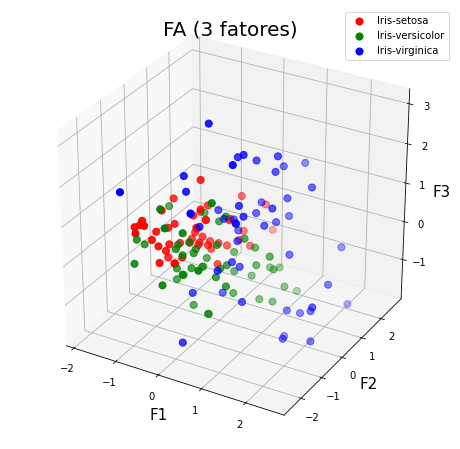

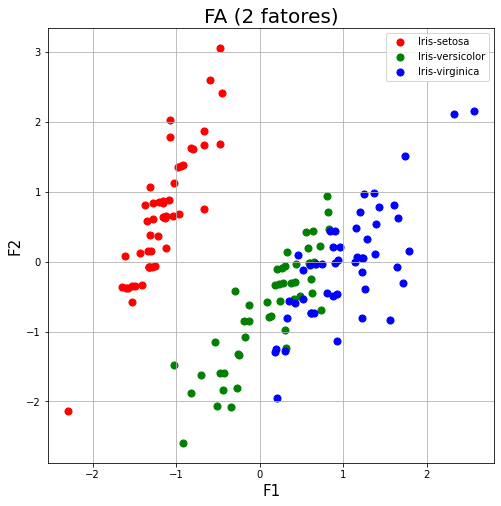

In [179]:
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values

x = StandardScaler().fit_transform(x)

# gráfico 3d
# pca3 = PCA(n_components=3)
# principalComponents = pca3.fit_transform(x)

fa3 = FactorAnalyzer(rotation="varimax", n_factors=3)
principalComponents = fa3.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['F1', 'F2', 'F3'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('F1', fontsize = 15)
ax.set_ylabel('F2', fontsize = 15)
ax.set_zlabel('F3', fontsize = 15)
ax.set_title('FA (3 fatores)', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'F1'], 
               finalDf.loc[indicesToKeep, 'F2'],
               finalDf.loc[indicesToKeep, 'F3'],
               c = color, s = 50)
ax.legend(targets)
ax.grid()

# gráfico 2d
fa2 = FactorAnalyzer(rotation="varimax", n_factors=2)
principalComponents = fa2.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['F1', 'F2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('F1', fontsize = 15)
ax.set_ylabel('F2', fontsize = 15)
ax.set_title('FA (2 fatores)', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'F1'], 
               finalDf.loc[indicesToKeep, 'F2'],               
               c = color, s = 50)
ax.legend(targets)
ax.grid()

---

#### Uniform Manifold Approximation and Projection (UMAP)

***Uniform [Manifold](https://mathworld.wolfram.com/Manifold.html) Approximation and Projection*** significa algo como *projeção e aproximação múltipla uniforme* (ou simplesmente UMAP), e é uma técnica relativamente recente de redução de dimensionalidades. Segundo [MacInnes, Healy e Melville (2020)](https://arxiv.org/pdf/1802.03426.pdf), ela é baseada na [geometria Riemanniana](https://en.wikipedia.org/wiki/Riemannian_geometry) e na [topologia algébrica](https://en.wikipedia.org/wiki/Algebraic_topology), resultando em um algoritmo escalável e prático, competitivo com o t-SNE para qualidade de visualização, preservando melhor a estrutura global dos elementos, tendo desempenho de tempo de execução superior. 

Em termos gerais, consegue identificar grupos de elementos vizinhos com alta coesão, ao mesmo tempo que consegue maximizar as distâncias entre grupos diferentes. Com isso, provê uma maneira informativa para representar e visualizar a heterogeneidade de dados.

Para um detalhamento mais profundo de seu funcionamento, sugiro assistir ao vídeo de [Leland McInnes](https://www.youtube.com/watch?v=nq6iPZVUxZU&t=765s), na conferência Scipy de 2018.

O primeiro passo é instalar a biblioteca:

In [180]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Vamos carregar um *dataset* diferente, disponível no seguinte URL: https://github.com/allisonhorst/palmerpenguins. Esse contém informações sobre algumas espécies de Pinguins, e foi criado para treinarmos técnicas de exploração e visualização de dados. 

In [181]:
import umap
import seaborn as sns
from sklearn.preprocessing import StandardScaler

pinguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")
pinguins = pinguins.dropna() # remove registros com dados faltantes

Vamos ver o dataset e contar quantos animais por tipo existem. 

Perceba que há $344$ animais distribuídos de maneira desbalanceada em $3$  espécies diferentes:

In [182]:
pinguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [183]:
pinguins.species.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

Algumas das dimensões são categóricas, então vamos selecionar somente aquelas que são numéricas e contínuas. 

Cabe salientar que UMAP pode ser aplicada a dados mistos, mas seria necessário separar em dois `manifolds`, um para cada tipo de dado, já que é necessário computar adequadamente as distâncias entre os pontos, e depois combiná-los ou interseccioná-los de alguma maneira. Para maiores detalhes, sugiro ler o [material disponível aqui](https://medium.com/analytics-vidhya/the-ultimate-guide-for-clustering-mixed-data-1eefa0b4743b).

In [184]:
# seleciona dimensões que fazem sentido de serem processadas (numéricas)
dados = pinguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g",]].values

dados_normalizados = StandardScaler().fit_transform(dados)  

redutor_umap = umap.UMAP()
embedding = redutor_umap.fit_transform(dados_normalizados)
embedding.shape

(333, 2)

O resultado é uma matriz com $333$ amostras, mas apenas duas colunas de recursos (em vez das quatro com as quais começamos). Isso ocorre porque, por padrão, UMAP reduz para 2D. 

Cada linha da matriz é uma representação bidimensional do pinguim correspondente. Assim, podemos plotar a incorporação (o *embedding*) como um gráfico de dispersão padrão e cor pela matriz de destino (uma vez que se aplica aos dados transformados que estão na mesma ordem que o original).

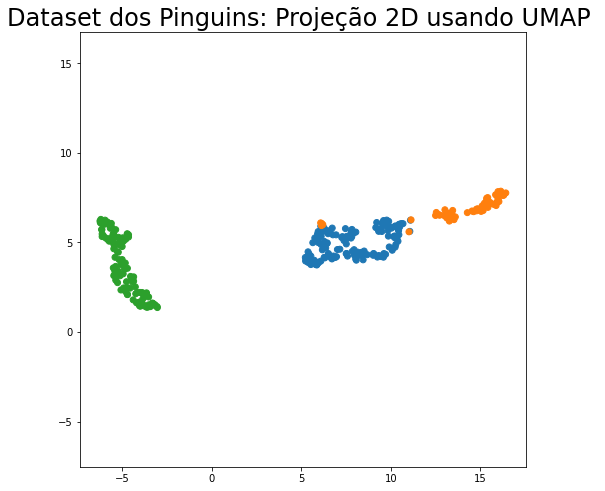

In [185]:
fig = plt.figure(figsize = (8,8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in pinguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('Dataset dos Pinguins: Projeção 2D usando UMAP ', fontsize=24);

UMAP consegue capturar bem a estrutura dos dados. Se tivéssemos dados com um número maior de dimensões, a matriz do gráfico de dispersão rapidamente se tornaria difícil de *plotar* e mais difícil de interpretar.

---
**Exercício 4**: utilize novamente o *dataset* `Iris` e aplique UMAP para gerar uma visualização 2D dos dados. Avalie se foi possível manter a estrutura original de classes.

**Desafio**: Após, clusterize com `k-means`, usando o método do cotovelo para identificar a melhor quantidade de clusters e avalie se o resultado em termos de acurácia é próximo da categorização original. 

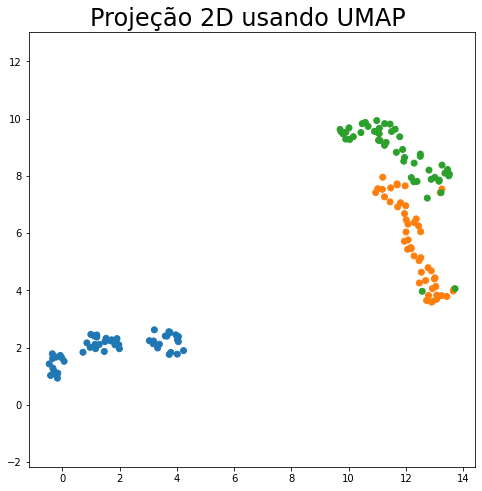

In [193]:
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values

x = StandardScaler().fit_transform(x)

redutor_umap = umap.UMAP()
embedding = redutor_umap.fit_transform(x)
embedding.shape

fig = plt.figure(figsize = (8,8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in df.target.map({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('Projeção 2D usando UMAP ', fontsize=24);

---
### Leitura recomendada:
- [Decrypting Dimensionality Reduction](https://medium.com/analytics-vidhya/decrypted-dimensionality-reduction-4064bfecb87f)
- [Performance Comparison of Dimension Reduction Implementations](https://umap-learn.readthedocs.io/en/latest/benchmarking.html)